# Clustering with multiple components

Computing minimum spanning trees on large, high-dimensional data can be a lot
more expensive than finding (approximate) nearest neighbors. In cases where
sufficient neighbors are detected, this compute cost can be avoided by
clustering on the (approximate) knn graph because ``plscan`` supports inputs
that form multiple connected components.

Let's load libraries and grab some data to demonstrate:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from plscan import PLSCAN
from sklearn.datasets import make_blobs

plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (2.75, 0.618 * 2.75)

X, _ = make_blobs(n_samples=200, random_state=10)

The 50 nearest neighbors of this data set do not form a single connected
component. ``plscan`` will compute clusters as if each component in the input
was given separately. As a result, the components themselves cannot be detected
as clusters.

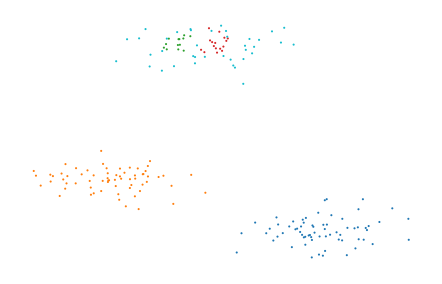

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=50).fit(X).kneighbors(X)
c = PLSCAN(metric='precomputed').fit(knn)

plt.scatter(*X.T, c=c.labels_ % 10, s=1, linewidth=0, cmap="tab10")
plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

The leaf and condensed trees are not compatible with code written for
``hdbscan`` because they may form forests instead of trees. 

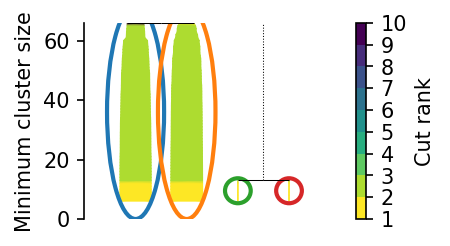

In [ ]:
c.leaf_tree_.plot(select_clusters=True)
plt.show()

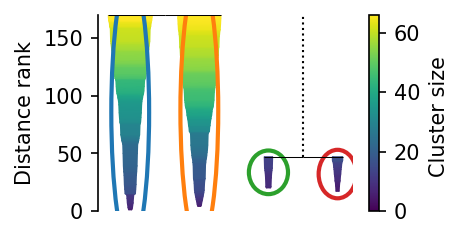

In [ ]:
c.condensed_tree_.plot(select_clusters=True)
plt.show()